In [81]:
#패키지를 불러옵니다.
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl

#주피터 노트북내에 그림을 표시 합니다.
%matplotlib inline

# 폰트 설정
mpl.rc('font', family='NanumGothic')

#그래프의 폰트를 선명하게 출력합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 음수값 깨짐 방지
mpl.rc('axes', unicode_minus=False)

In [82]:
#데이터 불러오기
data = pd.read_csv("data/@preprocessing_data_member01.csv", encoding = 'utf-8')
data.columns

Index(['Unnamed: 0', 'ID', '총구매수량_x', '기타품목구매비율', '수저류구매비율', '실링구매비율',
       '용기류구매비율', '위생용품구매비율', '총구매횟수', '총판매액', '총할인금액', '총순수이익', '나이',
       '사용가능 적립금', '성별', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분',
       '회원구분', '지역', '세부지역', '주소', '최종주문일(clean)', '최종주문연도', '최종주문월', '최종주문일자',
       '최종주문요일', '최종주문시간', '회원가입일(clean)', '가입연도', '가입월', '가입일자', '가입요일'],
      dtype='object')

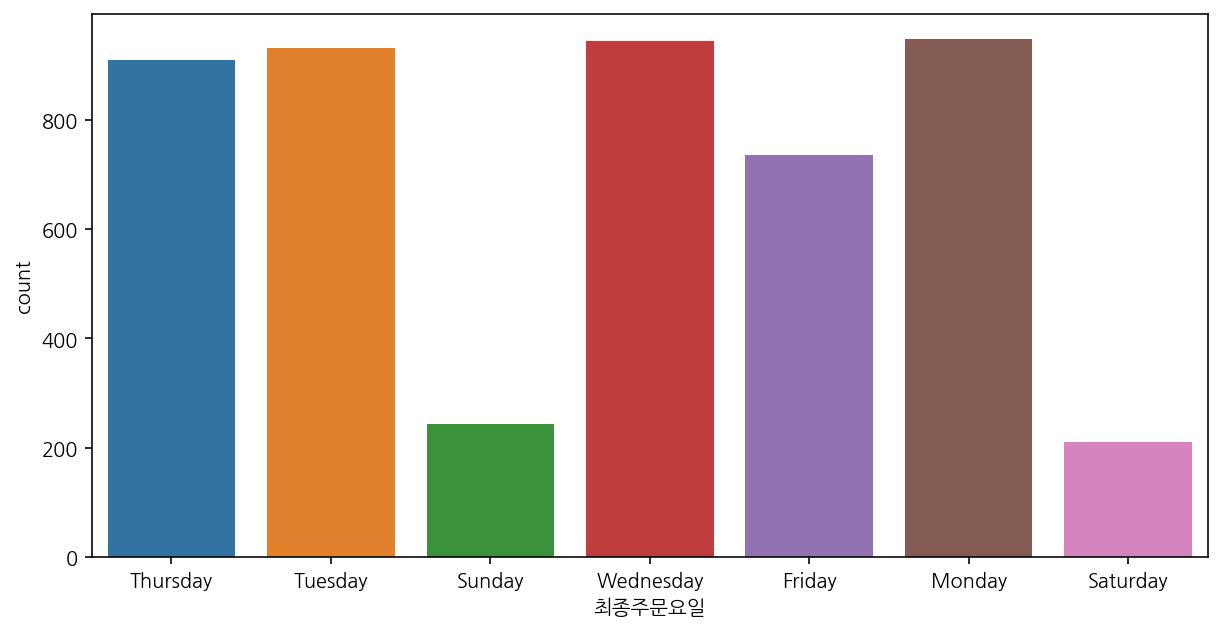

In [83]:
# 4-1 
plt.figure(figsize=[10,5])
sns.countplot(x='최종주문요일', data=data)

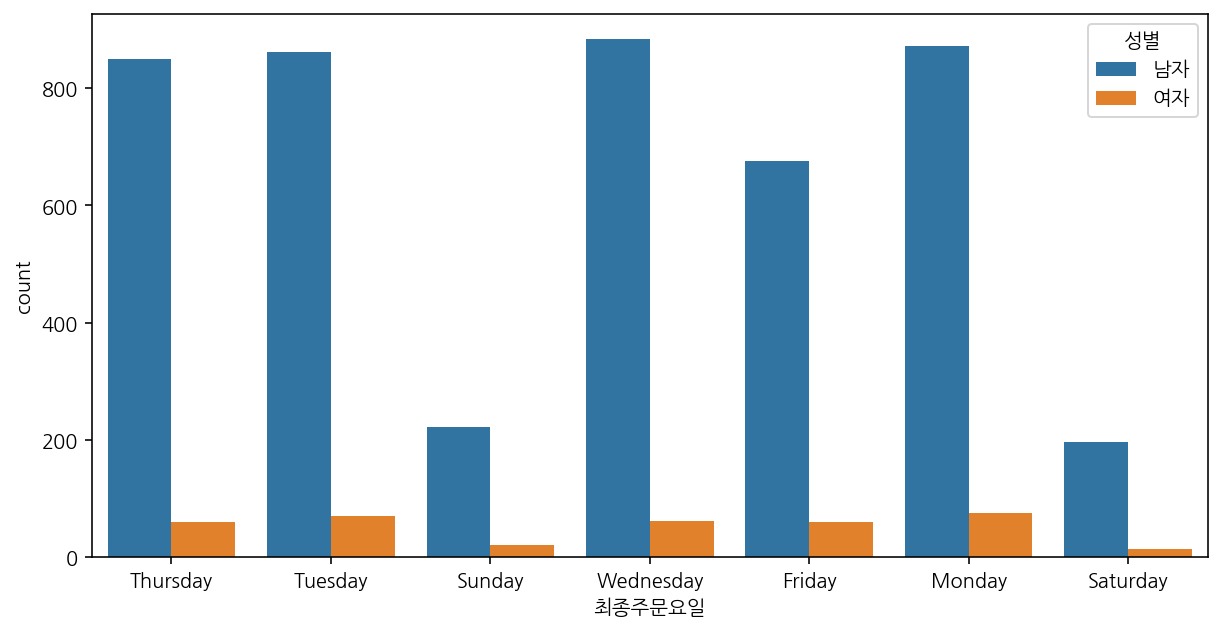

In [84]:
# 4-2
plt.figure(figsize=[10,5])
sns.countplot(data=data, x = '최종주문요일', hue='성별')

Text(0.5, 1.0, '가입월')

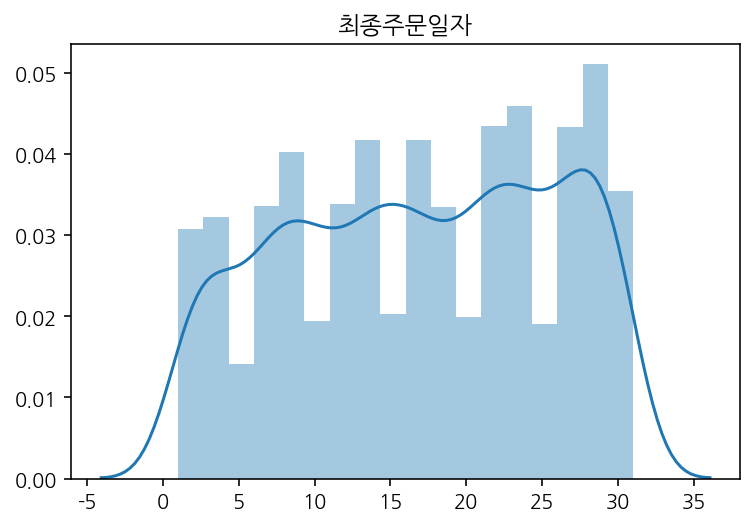

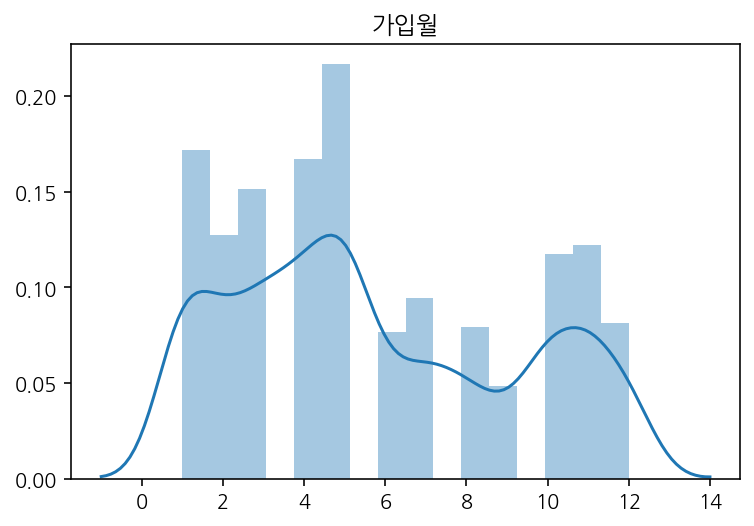

In [85]:
# 4-3
ax = plt.subplots()
ax = sns.distplot(data[['최종주문일자']])
ax.set_title('최종주문일자')

ax2 = plt.subplots()
ax2 = sns.distplot(data[['가입월']])
ax2.set_title('가입월')


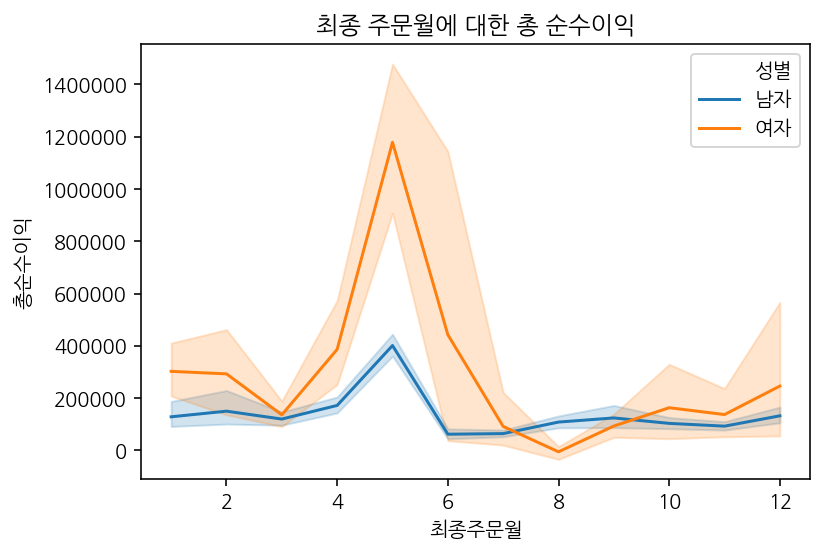

In [86]:
# 4-4
sns.lineplot( data=data, x="최종주문월", y='총순수이익', hue='성별')
plt.title("최종 주문월에 대한 총 순수이익")
plt.show()

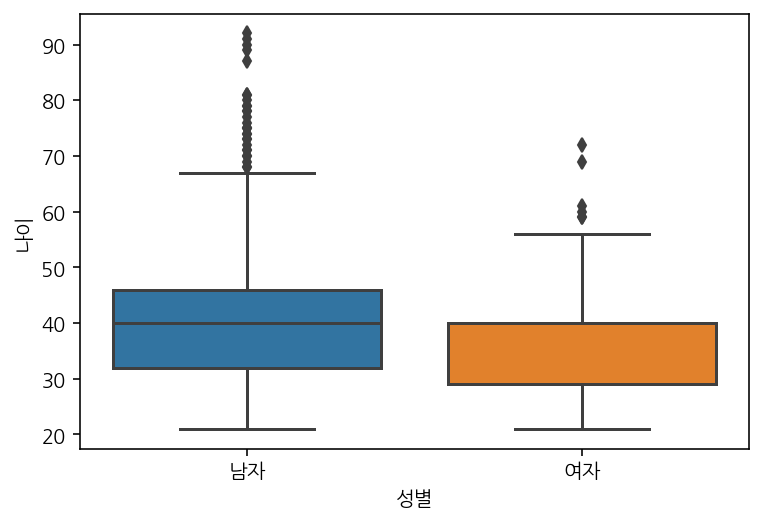

In [87]:
# 4-5
sns.boxplot( data=data, x='성별', y="나이")
plt.show()

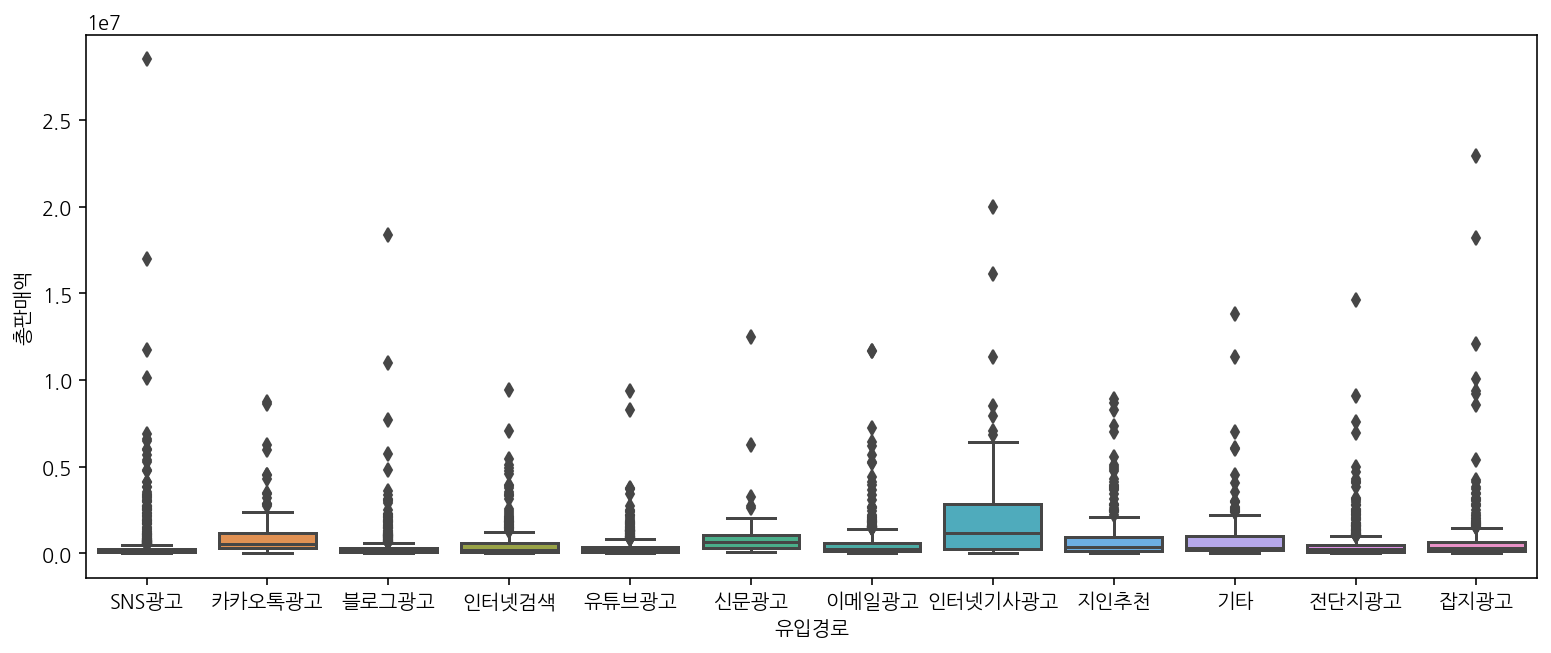

In [128]:
# 4-6
ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(data=data, x='유입경로', y="총판매액")
plt.show()

In [90]:
# 4-7
def sep(n):
    return n.split(' ')[0]
    
data['주소(시,도)']=data['주소'].apply(sep)
pd.pivot_table(data=data, index='주소(시,도)', values='총판매액', aggfunc='sum').sort_values('총판매액')

,총판매액
"주소(시,도)",
세종특별자치시,19710650
미확인,20486920
제주특별자치도,38806710
울산광역시,90066830
광주광역시,97013340
전라남도,100715730
인천광역시,104115570
대전광역시,116976150
충청남도,119980010


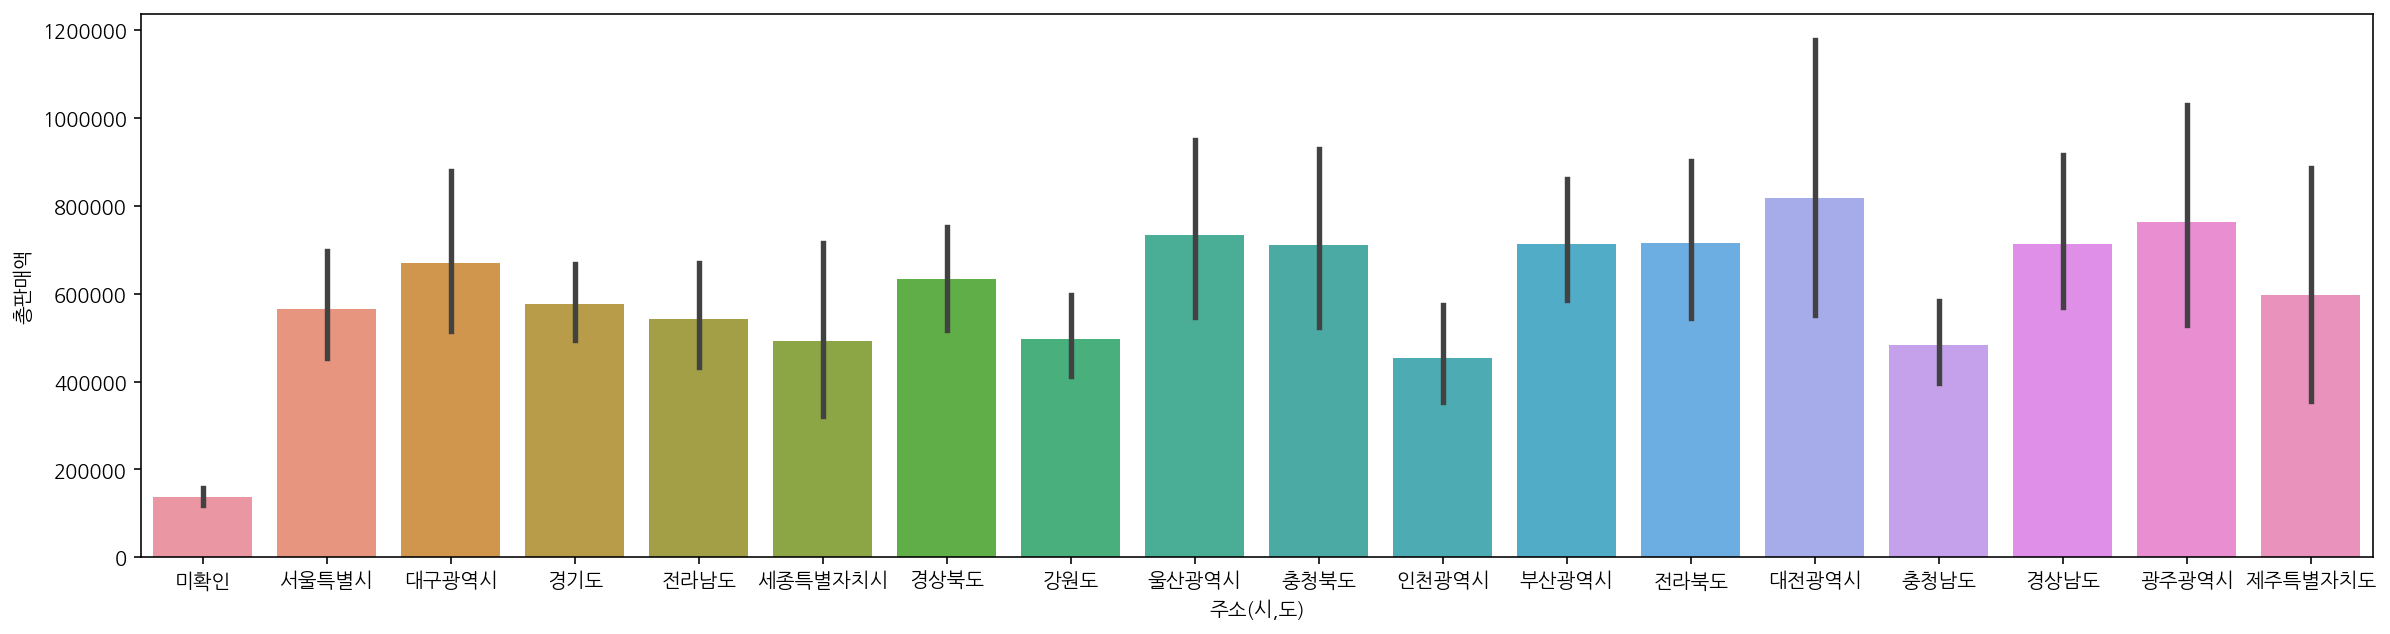

In [97]:
# 4-8
def sep(n):
    return n.split(' ')[0]
    
data['주소(시,도)']=data['주소'].apply(sep)
df = pd.pivot_table(data=data, index='주소(시,도)', values='총판매액', aggfunc='sum')
df['주소(시,도)'] = df.index
ax = plt.subplots(figsize=(20,5))
ax = sns.barplot( data=data, x='주소(시,도)', y="총판매액")

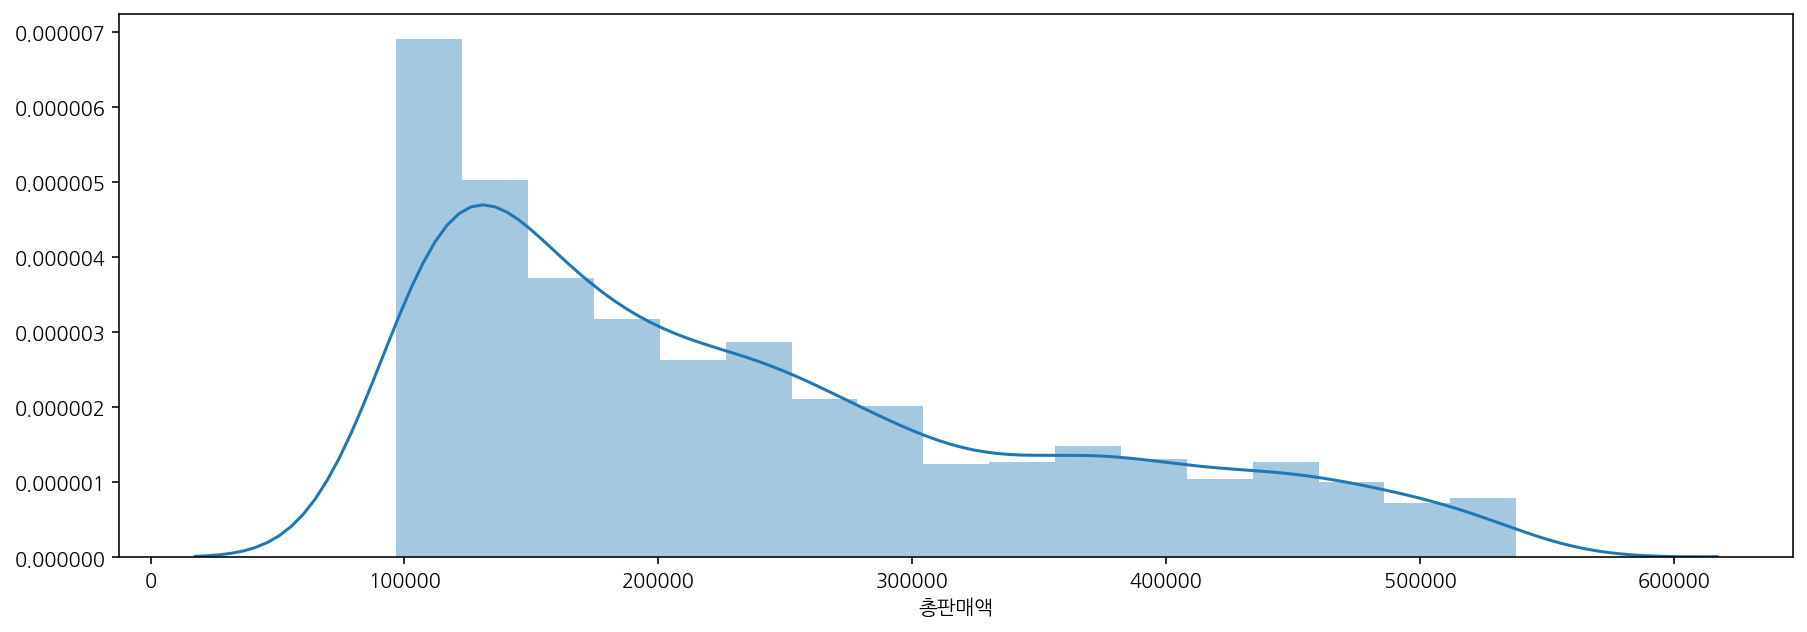

In [98]:
# 4-9
smr = data['총판매액'].describe()
gt = data[data['총판매액']>=smr[4]]
rst = gt[gt['총판매액']<=smr[6]]
ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(rst['총판매액'])

              총구매횟수     총판매액
ID                          
100304734@n       1   103300
1003409866@k     18  4303880
100381931@n       3    71050
1004498382@k      1    76400
1004547839@k      1   360800
...             ...      ...
zxvnm07           1    94380
zxxz60            6  1341280
zzar2000         19  1534750
zzbbwmf           6  1160550
zzzxkxk91         1   153650

[4924 rows x 2 columns]


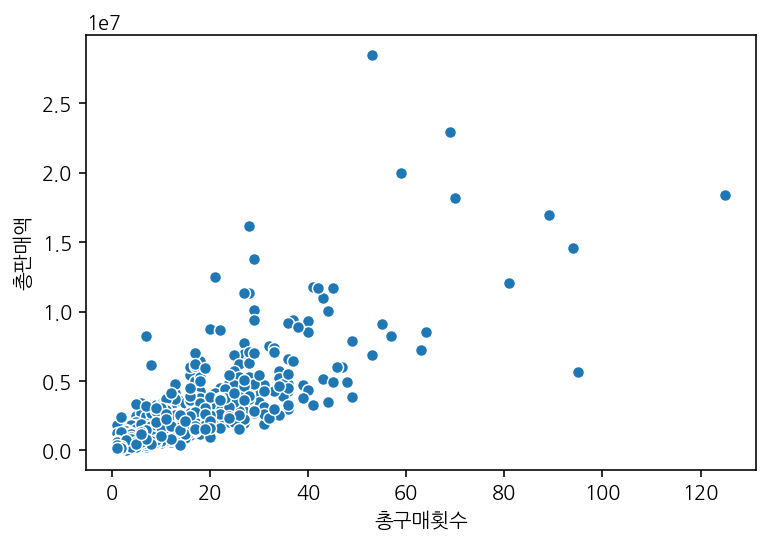

In [102]:
# 4-10
dt = pd.pivot_table(data=data, index='ID', values=['총판매액','총구매횟수'])
print(dt)
sns.scatterplot( data=dt, x="총구매횟수", y='총판매액' )

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


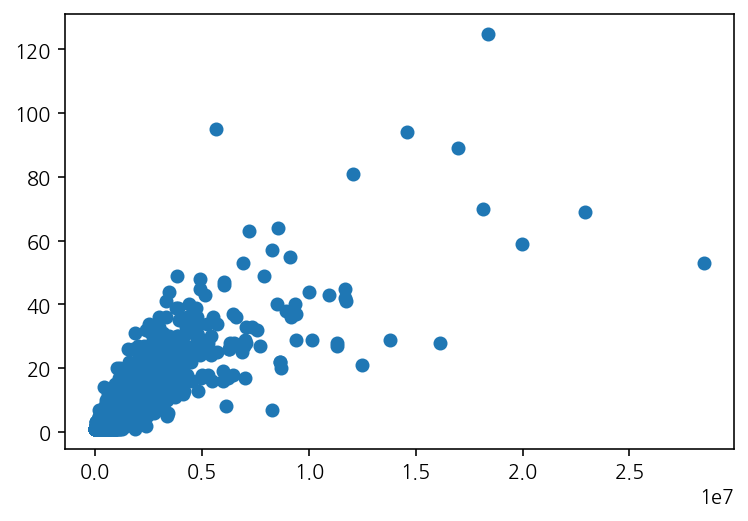

In [121]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
print(type(data.groupby('ID')[['총구매횟수','총판매액']]))
data3 = data.groupby('ID')[['총구매횟수','총판매액']].sum()
print(type(data3))
axes1.scatter(data3['총판매액'],data3['총구매횟수'])

In [129]:
len(data['ID'].unique()) == len(data['ID'])

True

In [210]:
ex = pd.DataFrame(index=data['ID'])
ex['총구매횟수'] = data['총구매횟수']
ex['총구매횟수']


ID
100304734@n    NaN
1003409866@k   NaN
100381931@n    NaN
1004498382@k   NaN
1004547839@k   NaN
                ..
zxvnm07        NaN
zxxz60         NaN
zzar2000       NaN
zzbbwmf        NaN
zzzxkxk91      NaN
Name: 총구매횟수, Length: 4924, dtype: float64

In [194]:
ex = pd.DataFrame(
{'c':[1,2],'d':[2,4]}, index=['a','b'], columns=['d','c']
)
ex.head()


,d,c
a,2,1
b,4,2


In [195]:
len(data['총판매액']) == len(data['총판매액'].unique())  

False